#**Importing the libraries**

In [12]:
import numpy as np
import pandas as pd

#Importing the dataset

In [13]:
df = pd.read_csv('/content/heart.csv')

Returns number of rows and columns of the dataset

In [14]:
df.shape

(303, 14)

Returns an object with all of the column headers

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Returns true for a column having null values, else false

In [16]:
df.isnull().any()

,0
age,False
sex,False
cp,False
trestbps,False
chol,False
fbs,False
restecg,False
thalach,False
exang,False
oldpeak,False


Returns basic information on all columns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Returns basic statistics on numeric columns

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


#Visualising the data

Importing essential libraries

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Plotting histogram for the entire dataset

<ipython-input-20-3980286831>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = df.hist(ax=ax)


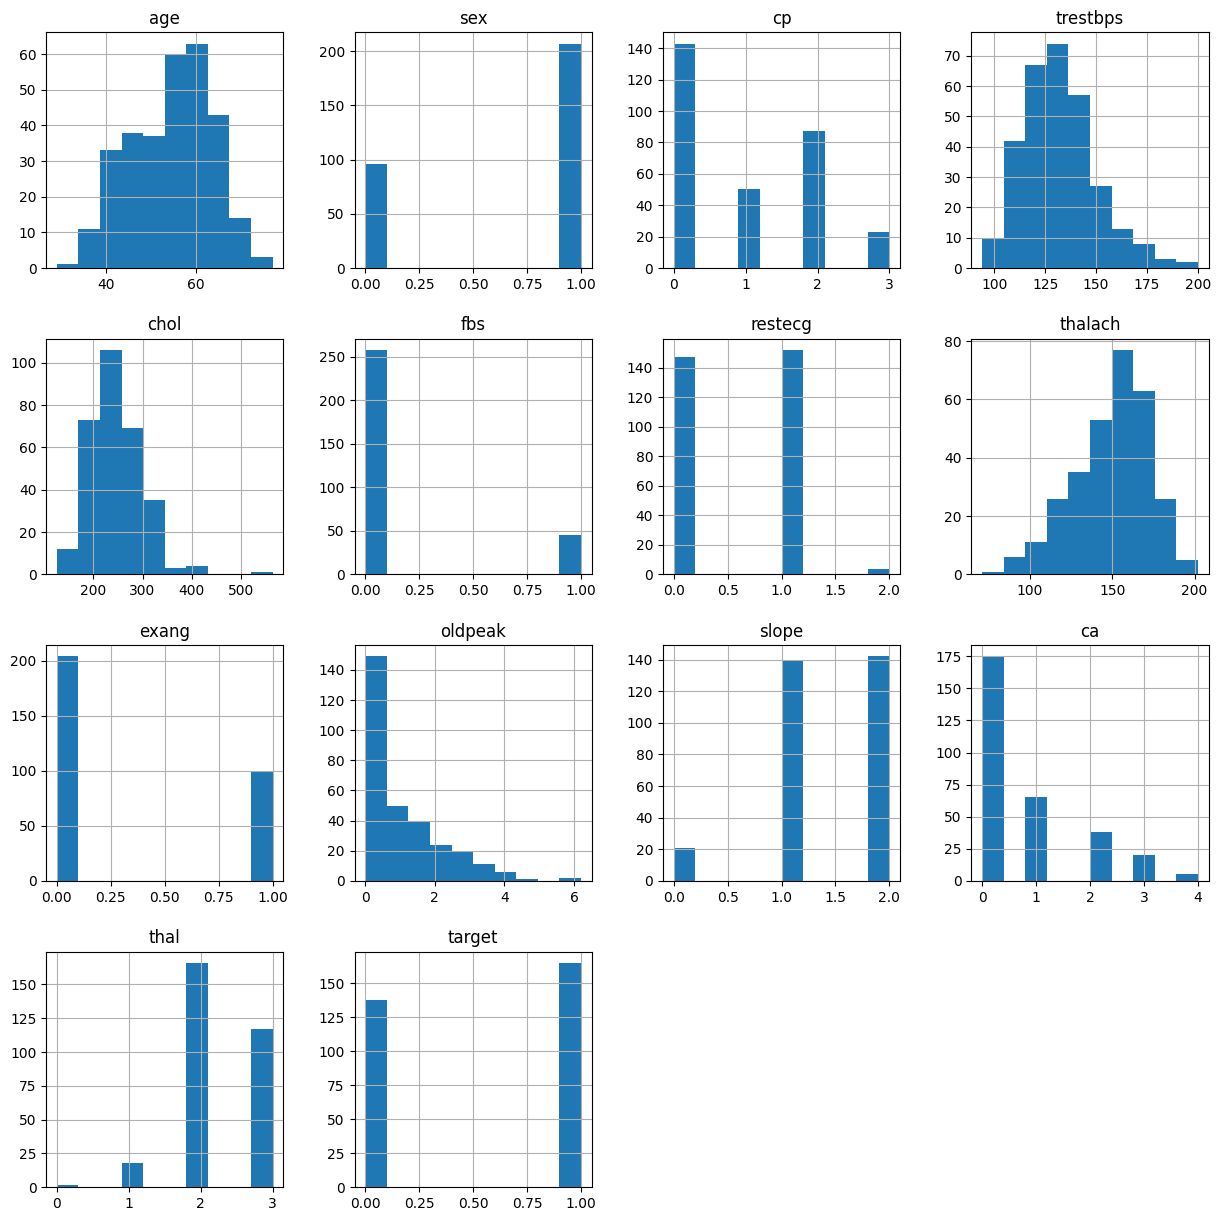

In [20]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

Visualization to check if the dataset is balanced or not

Text(0, 0.5, 'Count')

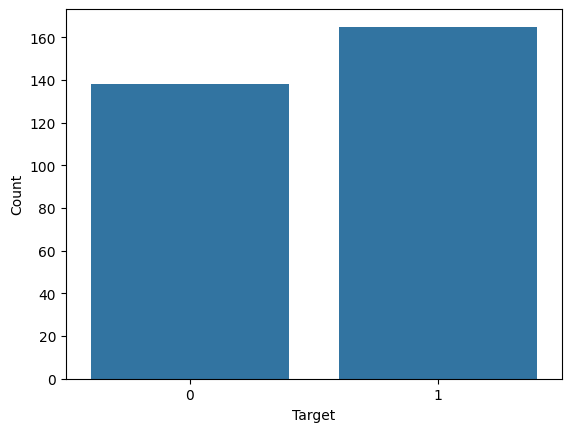

In [21]:
g = sns.countplot(x='target', data=df)
plt.xlabel('Target')
plt.ylabel('Count')

# **Feature Engineering**

<Axes: >

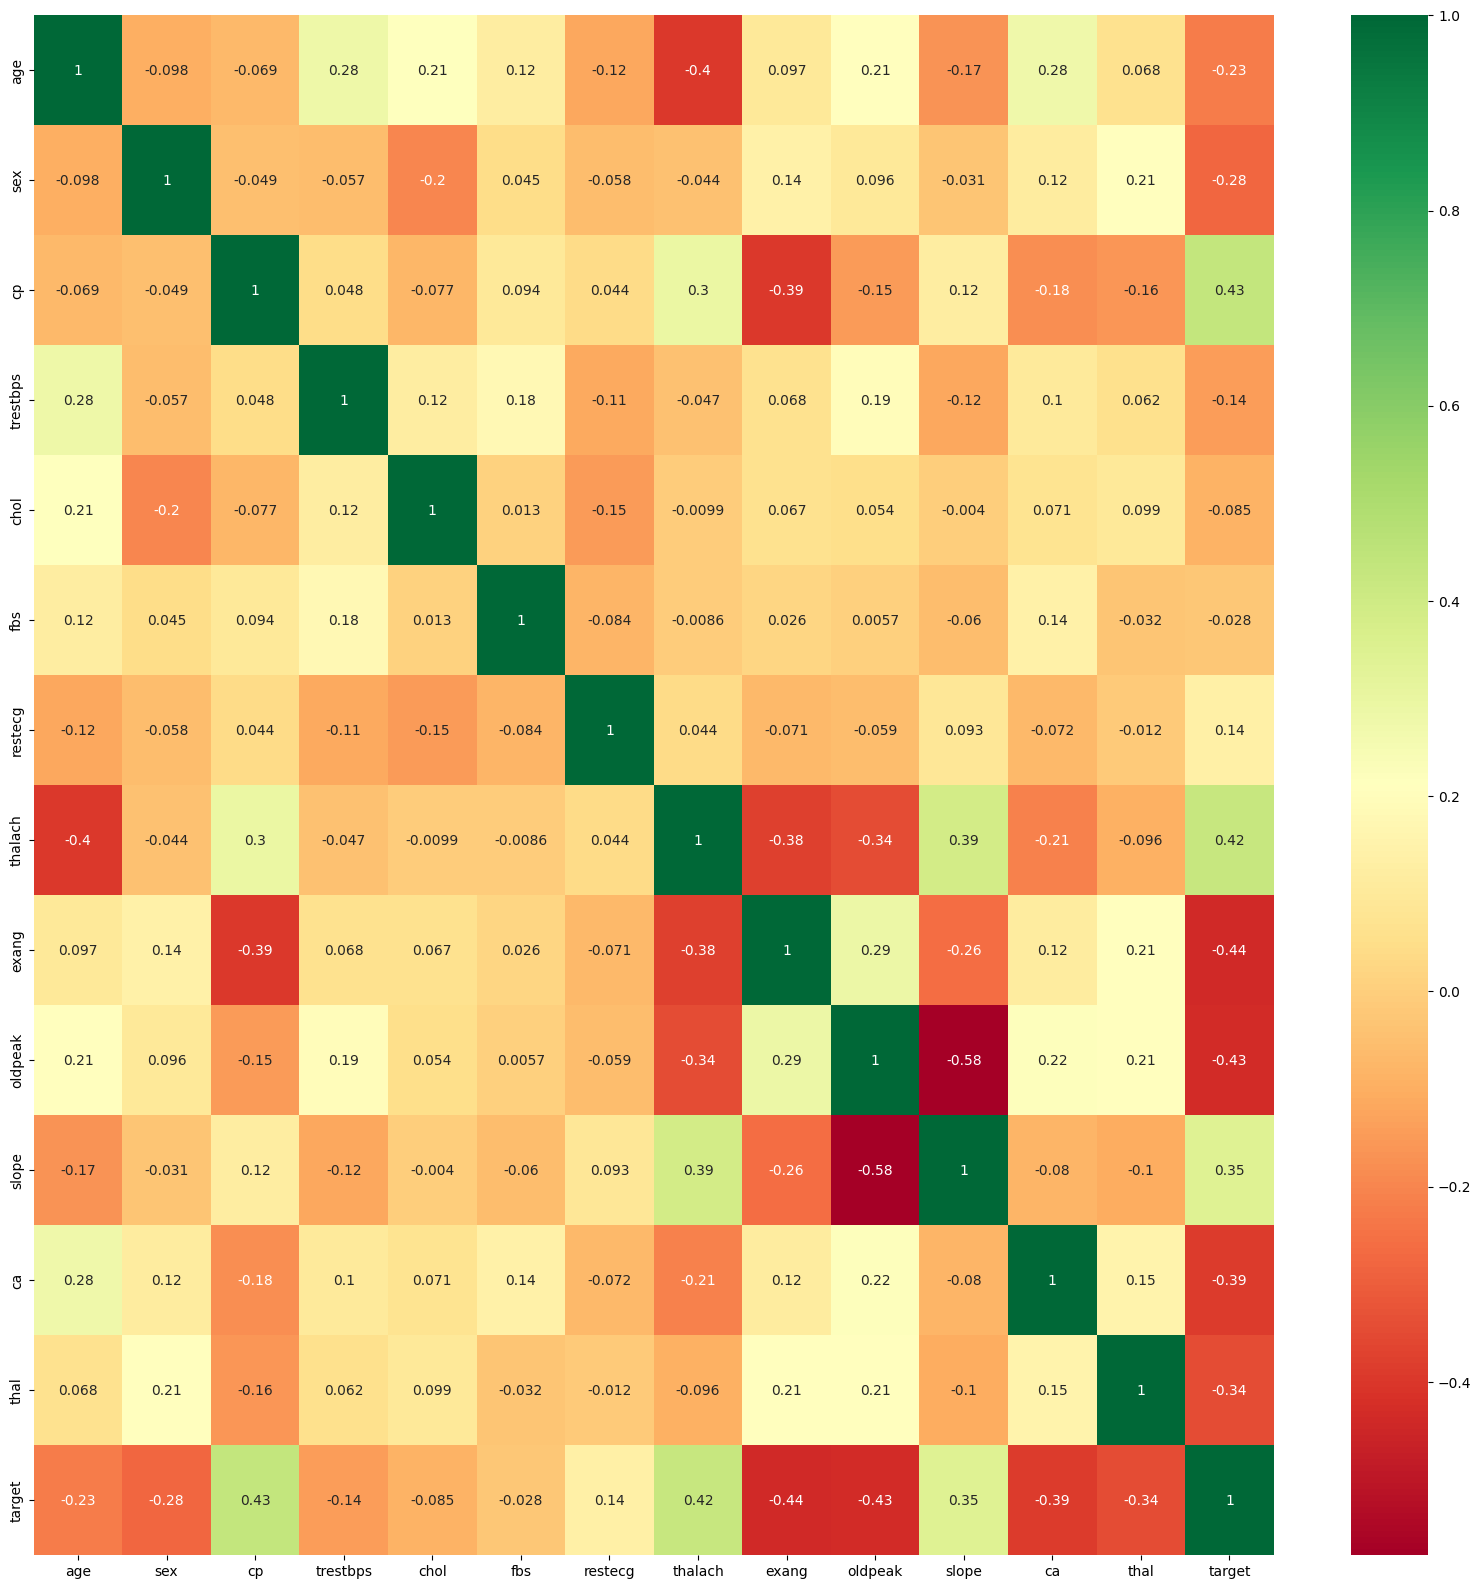

In [22]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

# **Data Preprocessing**

## Handling categorical features

After exploring the dataset, I observed that converting the categorical variables into dummy variables using 'get_dummies()'. Though we don't have any strings in our dataset it is necessary to convert ('sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal') these features.

*Example: Consider the 'sex' column, it is a binary feature which has 0's and 1's as its values. Keeping it as it is would lead the algorithm to think 0 is lower value and 1 is a higher value, which should not be the case since the gender cannot be ordinal feature.*

In [23]:
dataset = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

## Feature Scaling

In [24]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [25]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standScaler.fit_transform(dataset[columns_to_scale])

In [26]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


Splitting the dataset into dependent and independent features

In [27]:
X = dataset.drop('target', axis=1)
y = dataset['target']

# **Model Building**

I will be experimenting with 3 algorithms:
1. KNeighbors Classifier
2. Decision Tree Classifier
3. Random Forest Classifier

## KNeighbors Classifier Model

Importing essential libraries

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

Finding the best accuracy for knn algorithm using cross_val_score

In [29]:
knn_scores = []
for i in range(1, 21):
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  cvs_scores = cross_val_score(knn_classifier, X, y, cv=10)
  knn_scores.append(round(cvs_scores.mean(),3))

Plotting the results of knn_scores

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

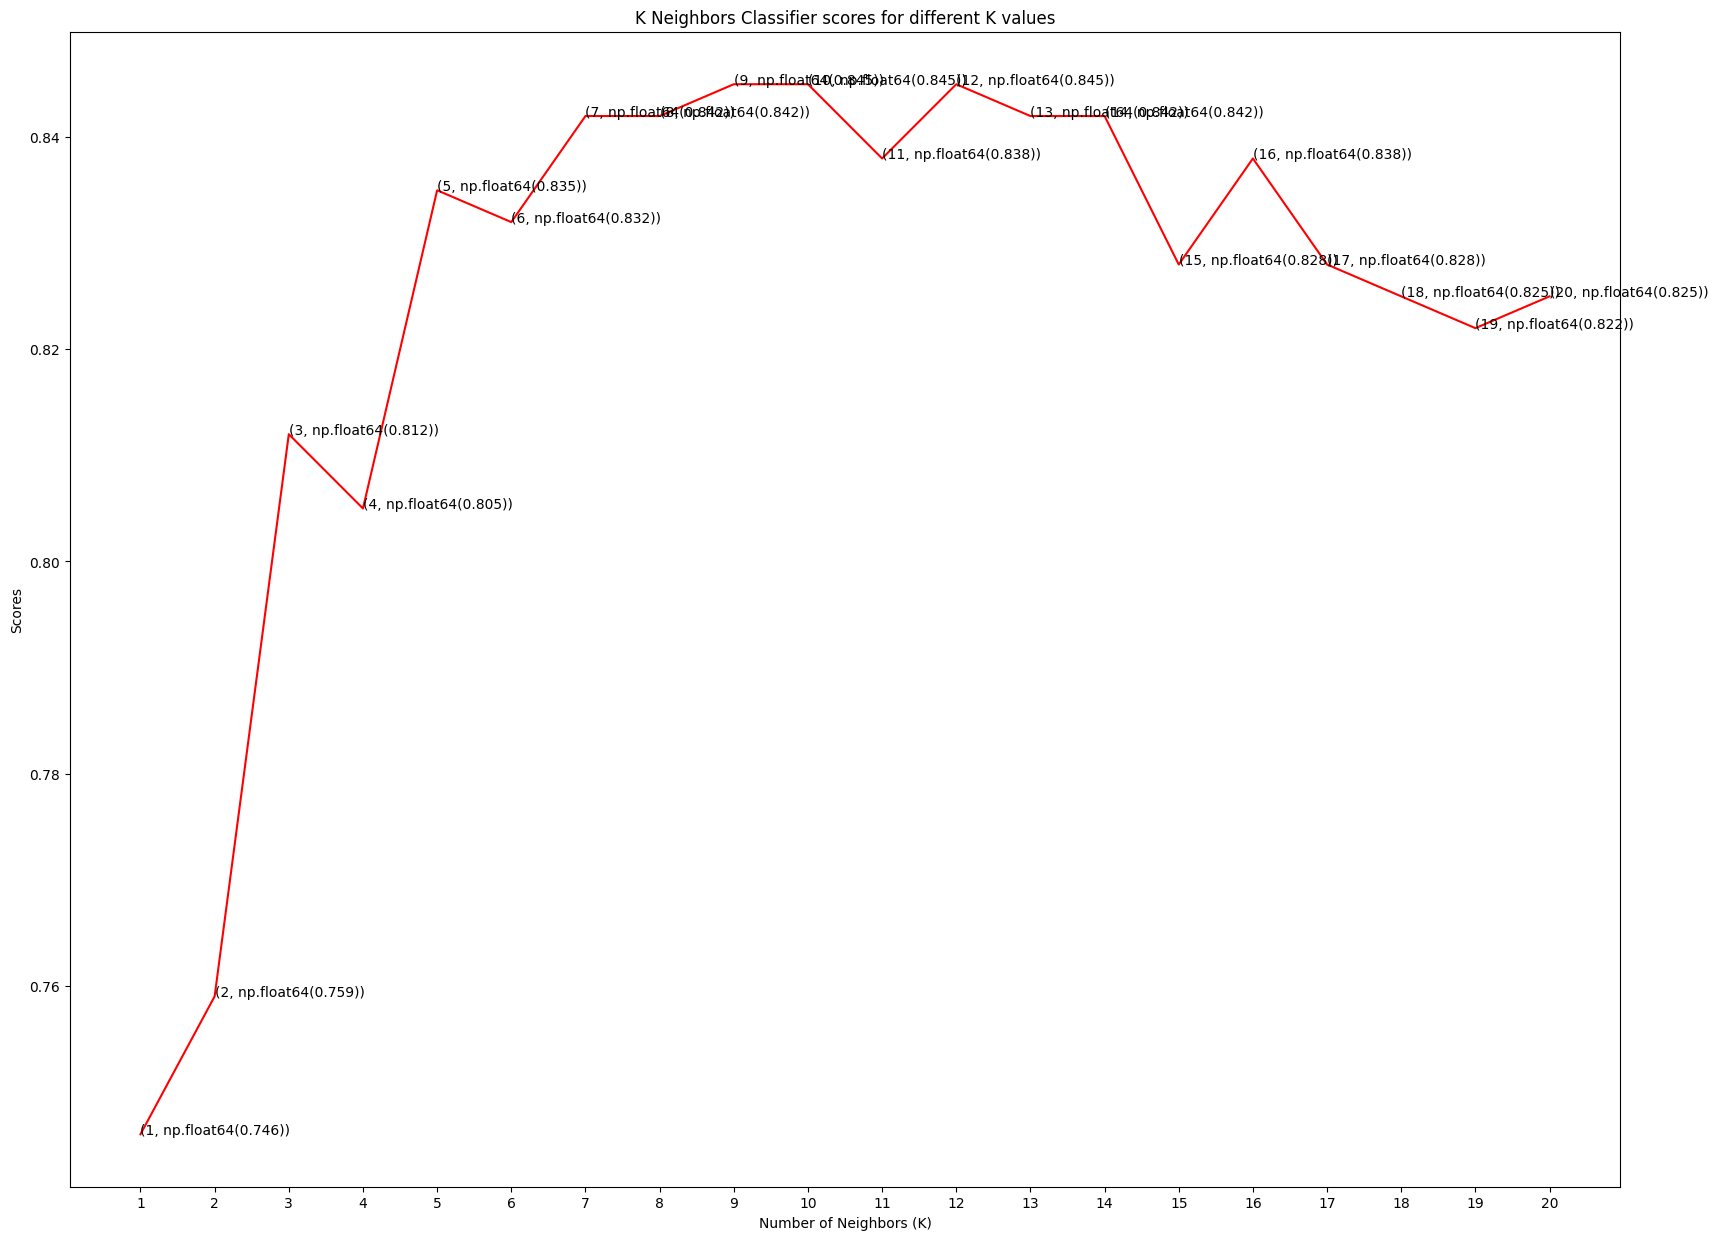

In [30]:
plt.figure(figsize=(20,15))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

Training the knn classifier model with k value as 12

In [31]:
knn_classifier = KNeighborsClassifier(n_neighbors=12)
cvs_scores = cross_val_score(knn_classifier, X, y, cv=10)
print("KNeighbours Classifier Accuracy with K=12 is: {}%".format(round(cvs_scores.mean(), 4)*100))

KNeighbours Classifier Accuracy with K=12 is: 84.48%


## Decision Tree Classifier

Importing essential libraries

In [32]:
from sklearn.tree import DecisionTreeClassifier

Finding the best accuracy for decision tree algorithm using cross_val_score

In [33]:
decision_scores = []
for i in range(1, 11):
  decision_classifier = DecisionTreeClassifier(max_depth=i)
  cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
  decision_scores.append(round(cvs_scores.mean(),3))

Plotting the results of decision_scores

Text(0.5, 1.0, 'Decision Tree Classifier scores for different depth values')

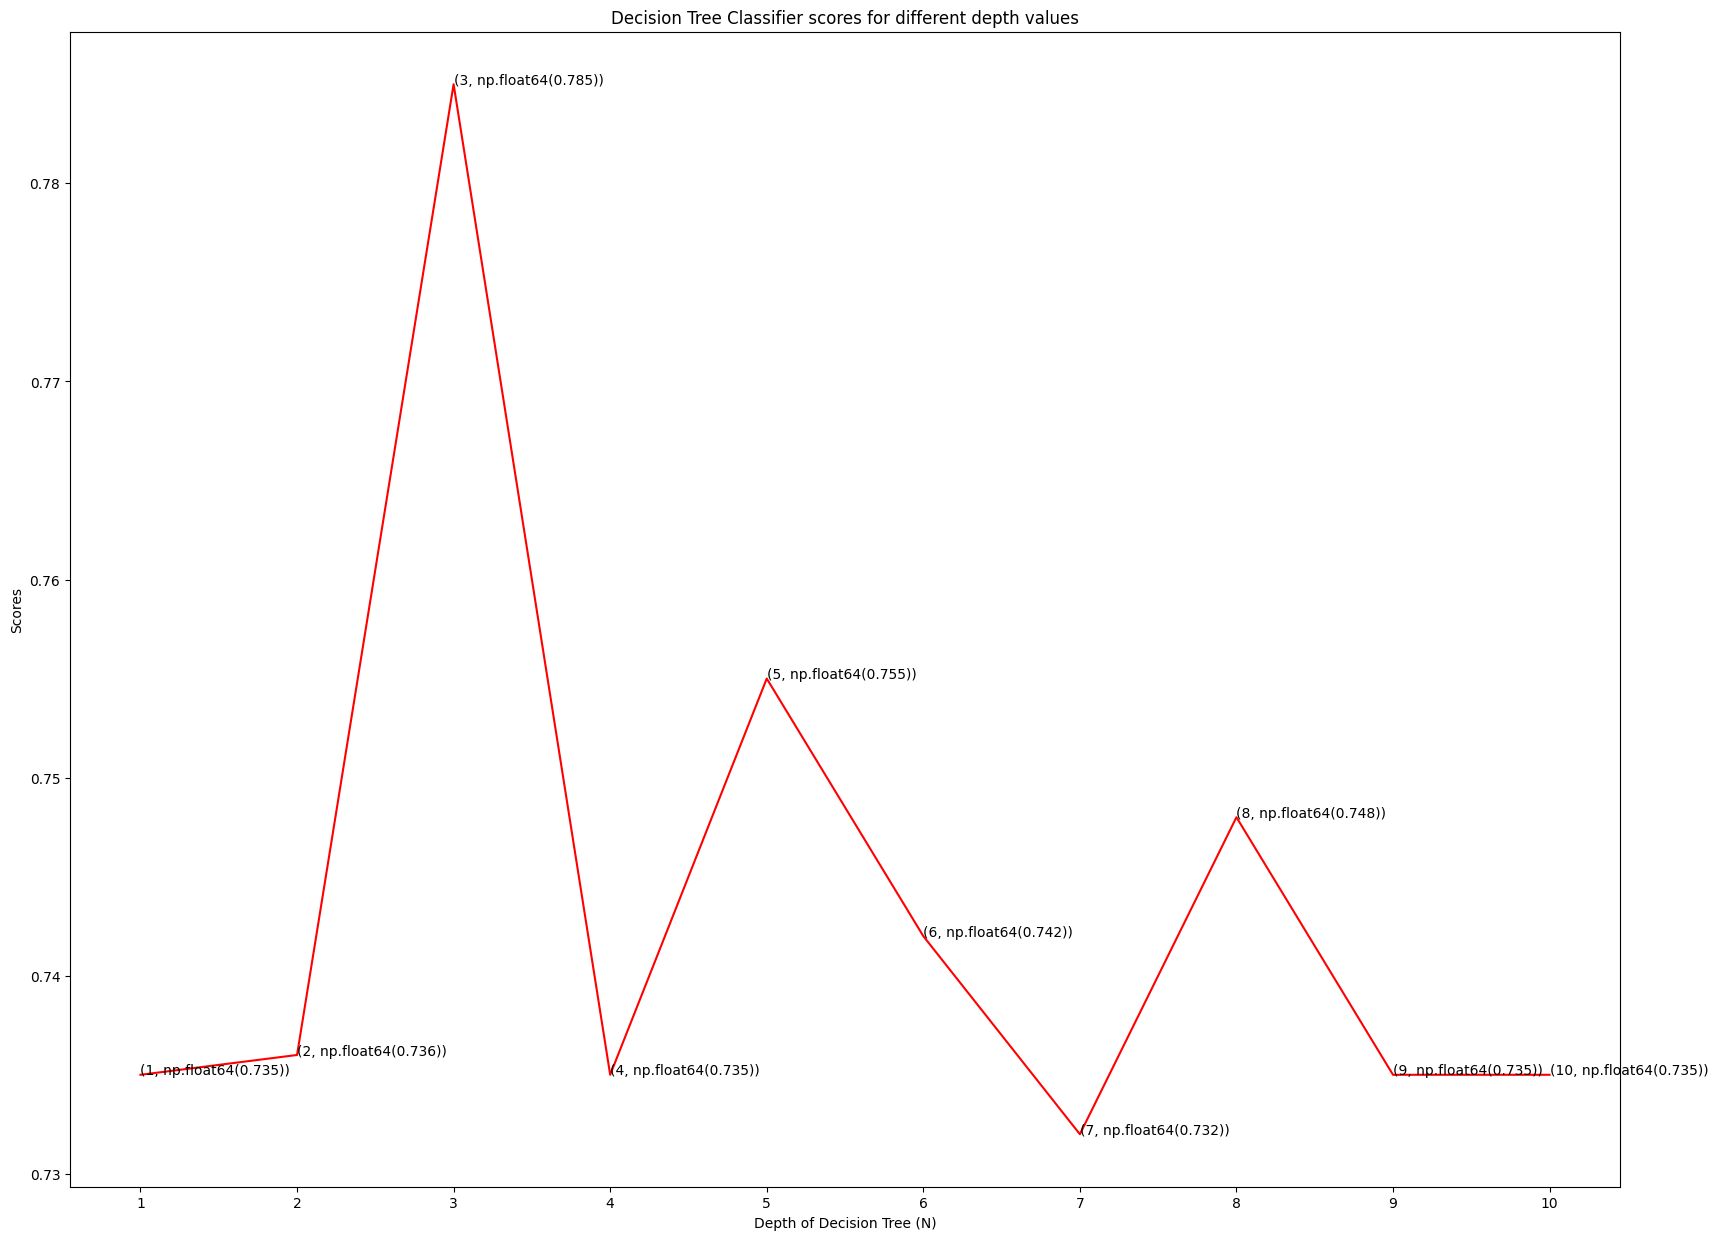

In [34]:
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], decision_scores, color = 'red')
for i in range(1,11):
    plt.text(i, decision_scores[i-1], (i, decision_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different depth values')

Training the decision tree classifier model with max_depth value as 3

In [35]:
decision_classifier = DecisionTreeClassifier(max_depth=3)
cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
print("Decision Tree Classifier Accuracy with max_depth=3 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Decision Tree Classifier Accuracy with max_depth=3 is: 78.51%


## Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

Finding the best accuracy for random forest algorithm using cross_val_score

In [37]:
forest_scores = []
for i in range(10, 101, 10):
  forest_classifier = RandomForestClassifier(n_estimators=i)
  cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
  forest_scores.append(round(cvs_scores.mean(),3))

Plotting the results of forest_scores

Text(0.5, 1.0, 'Random Forest Classifier scores for different N values')

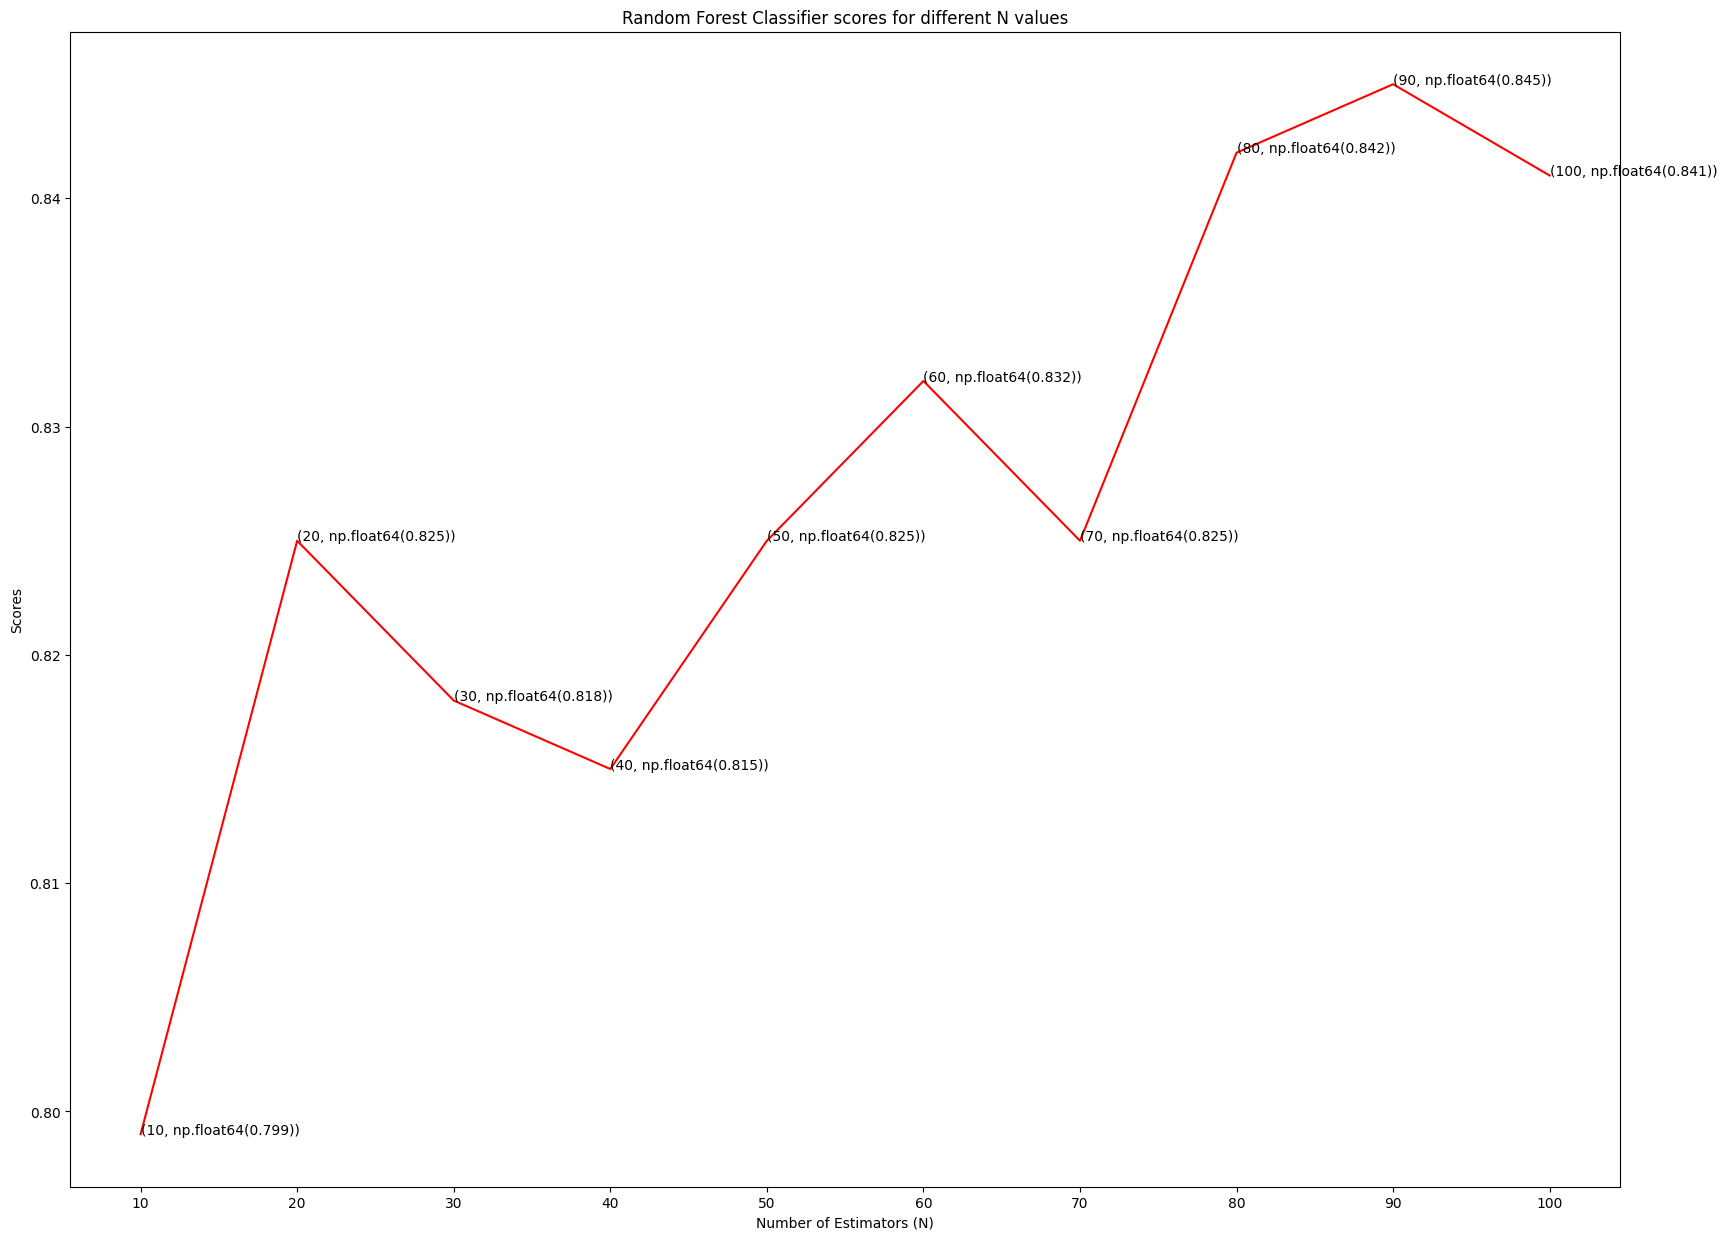

In [38]:
plt.figure(figsize=(20,15))
plt.plot([n for n in range(10, 101, 10)], forest_scores, color = 'red')
for i in range(1,11):
    plt.text(i*10, forest_scores[i-1], (i*10, forest_scores[i-1]))
plt.xticks([i for i in range(10, 101, 10)])
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')

Training the random forest classifier model with n value as 90

In [39]:
forest_classifier = RandomForestClassifier(n_estimators=90)
cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
print("Random Forest Classifier Accuracy with n_estimators=90 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Random Forest Classifier Accuracy with n_estimators=90 is: 83.83%
